In [30]:
import os

In [31]:
#mounting the google drive folder to change the directory being worked in
from google.colab import drive
drive.mount('/content/drive/')
%ls
%cd drive/
%ls
%cd My\ Drive
%ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'Colab Notebooks'/  'Getting started.pdf'
 data/               JamieAshcroft_Final_Report_2223.docx
[Errno 2] No such file or directory: 'drive/'
/content/drive/My Drive
'Colab Notebooks'/  'Getting started.pdf'
 data/               JamieAshcroft_Final_Report_2223.docx
[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive
'Colab Notebooks'/  'Getting started.pdf'
 data/               JamieAshcroft_Final_Report_2223.docx


In [32]:
import pandas as pd
strokeData = pd.read_csv("data/strokeDataset.csv")

print(strokeData.shape)
print(strokeData.head(5))

(5110, 12)
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [33]:
# here are the beginning imports
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#decided to try using pipelines 
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE


Here is the initial testing of the dataset import and checking for the size and datatypes of the set

In [34]:
print('--------Datasets Shape (Rows, Columns)---------')
print(strokeData.shape)

print('--------Dataset Datatypes---------')
print(strokeData.dtypes)

print('--------Datasets first 5 rows---------')
strokeData.head(5)

--------Datasets Shape (Rows, Columns)---------
(5110, 12)
--------Dataset Datatypes---------
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
--------Datasets first 5 rows---------


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The first main step will be to remove the id column as it is not useful to us

In [35]:
strokeData = strokeData.drop('id', axis = 1)
strokeData = strokeData.drop('work_type', axis = 1)

In [36]:
#double checking the column is gone
print('--------Datasets first 5 rows---------')
strokeData.head(5)

--------Datasets first 5 rows---------


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


Next the main step will be to clean the data and make sure the dataset is in a place to be worked with

In [37]:
#first we will check for duplicates
duplicate_rows_sd = strokeData[strokeData.duplicated()]
#displaying the number of duplicates
print(duplicate_rows_sd.shape)

(0, 10)


as we can see there are no duplicates so we can move on to the next step

In [38]:
#second we will check for any missing values
strokeData.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

From above we can see that the only NA values are in the BMI column therefore it would make sense to view the column and 
decide what we want to do with these columns.

The options are:
To remove these entries fully
OR
We can use the median to fill the NA values.

In [39]:
#For this dataset we will use option 2 to fill the na values using the median values.
median_bmi = strokeData['bmi'].median()

strokeData['bmi'] = strokeData['bmi'].fillna(median_bmi)

print("BMI Median : ", median_bmi)
print("Checking BMI for any NA values: ", strokeData['bmi'].isna().sum())

BMI Median :  28.1
Checking BMI for any NA values:  0


After failing at first to create the descision tree i realised its based on the fact i forgot to convert the String values to numerical
such as Male = 2  AND Female = 1 etc.

with this we should be able to view it on the heat map as well now.

In [40]:
#forgot to add an option on gender labelled other therefore it was causing issues with the heatmap
strokeData['gender'] = strokeData['gender'].replace({'Male':0,'Female':1,'Other':-1})
strokeData['Residence_type'] = strokeData['Residence_type'].replace({'Rural':0,'Urban':1})
strokeData['ever_married'] = strokeData['ever_married'].replace({'No':0,'Yes':1})

Now we can see that there are no more NA values in the BMI column as they have been filled out.
Now we need to visualise some aspects of the data in this case from the previous looks of the data we could see it was imbalanced.
As can be seen below

<Axes: >

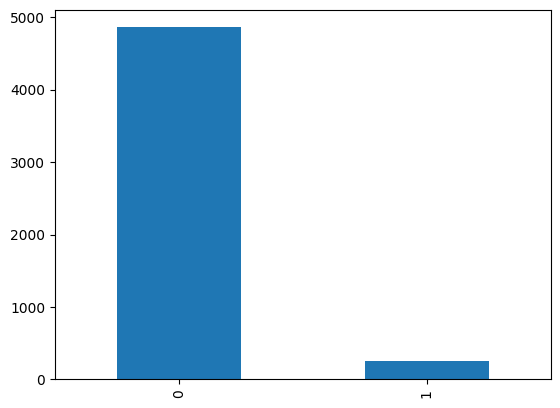

In [41]:
strokeData['stroke'].value_counts().plot(kind='bar')

The dataset is 95% of people in the dataset have not had a stroke. Which means we need to do some work to 
make the dataset more workable and give us a better final result. We can do this by working with a method called SMOTE.
SMOTE stands for Synthetic Minority Over-sampling Technique

From here we can do some more data exploring to see what correlations there are between the other value in the dataset.

<ipython-input-42-a3146870e8b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corl = strokeData.corr()


                     gender       age  hypertension  heart_disease  \
gender             1.000000  0.028202     -0.020994      -0.085447   
age                0.028202  1.000000      0.276398       0.263796   
hypertension      -0.020994  0.276398      1.000000       0.108306   
heart_disease     -0.085447  0.263796      0.108306       1.000000   
ever_married       0.031005  0.679125      0.164243       0.114644   
Residence_type     0.006738  0.014180     -0.007913       0.003092   
avg_glucose_level -0.055180  0.238171      0.174474       0.161857   
bmi                0.026952  0.324296      0.158293       0.036916   
stroke            -0.008929  0.245257      0.127904       0.134914   

                   ever_married  Residence_type  avg_glucose_level       bmi  \
gender                 0.031005        0.006738          -0.055180  0.026952   
age                    0.679125        0.014180           0.238171  0.324296   
hypertension           0.164243       -0.007913           0

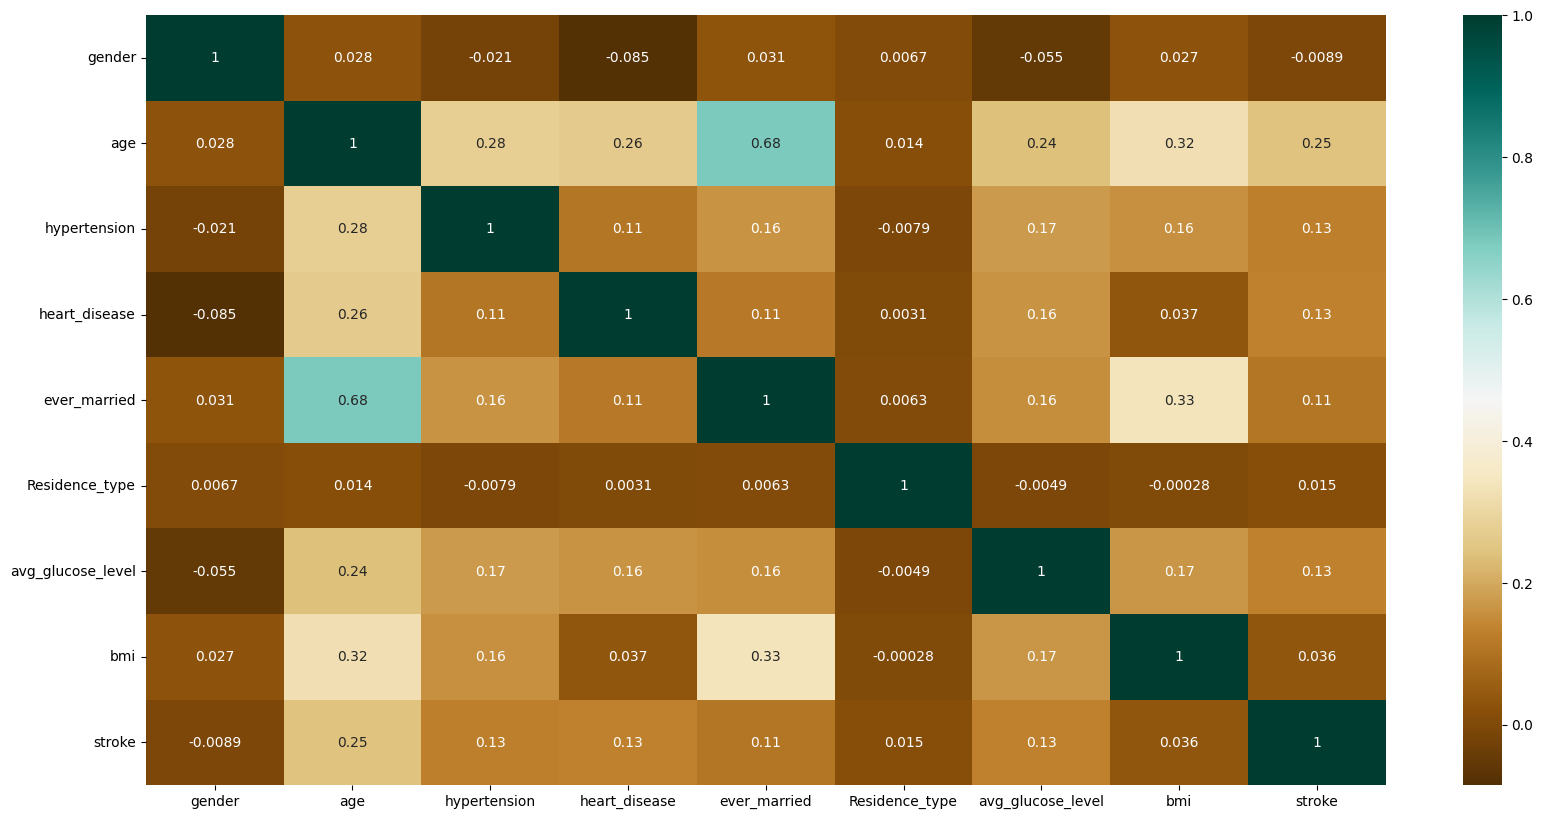

In [42]:
plt.figure(figsize=(20,10))
corl = strokeData.corr()
sns.heatmap(corl,cmap="BrBG", annot=True)
print(corl)

after creating the heatmap we can see that the highest rating we have is age and ever_married with the number of 0.68 which is a decent 
figure to achieve here.
you would expect from here can view some of the other values that dont contribute too much and lower down the fields that we will use 
for the descision tree and svm model. However some fields we may not want to remove even if the scores are low due to the fact of them
being medical values and how they work with other medical values in the dataset.


we can remove residence type and gender. we can also remove the smoking status column to due there being soo many values that are unknown and not wanting to generate values for these as it could skew the results.

In [43]:
strokeData = strokeData.drop('Residence_type', axis = 1)
strokeData = strokeData.drop('gender', axis = 1)
strokeData = strokeData.drop('smoking_status', axis = 1)


Here we can create the descision tree default without SMOTE, then with the SMOTE technique being used.

In [44]:
X = strokeData.drop(['stroke'], axis = 1)

X.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
0,67.0,0,1,1,228.69,36.6
1,61.0,0,0,1,202.21,28.1
2,80.0,0,1,1,105.92,32.5
3,49.0,0,0,1,171.23,34.4
4,79.0,1,0,1,174.12,24.0


In [45]:
y = strokeData['stroke']

print(y[0:5])

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [46]:
#try different random states to test results eg 1-50  try 1, 25, 42 and 50 on the video 
#as you can see 42 is better for the SVM and 50 is better for the DT
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

print(X_train.shape)

(1533, 6)


using smote to make the data less bias

In [47]:
oversample = SMOTE()
X_train_r, y_train_r = oversample.fit_resample(X_train, y_train.ravel())

In [48]:
desc_pipe = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(random_state=42))])
svm_pipe = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])

In [49]:
dt_cv = cross_val_score(desc_pipe,X_train_r,y_train_r,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipe,X_train_r,y_train_r,cv=10,scoring='f1')

In [50]:
print('Descision Tree mean :', dt_cv.mean())
print('SVM mean :', svm_cv.mean())

Descision Tree mean : 0.9165400816018534
SVM mean : 0.8612012120282548


due to the use of a pipeline we create the descision tree by using the build in feature below.

In [51]:
desc_pipe = desc_pipe.fit(X_train_r, y_train_r)

[Text(0.5089285714285714, 0.9, 'x[0] <= -0.199\ngini = 0.5\nsamples = 2914\nvalue = [1457, 1457]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= -0.382\ngini = 0.144\nsamples = 995\nvalue = [917, 78]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= -0.788\ngini = 0.074\nsamples = 861\nvalue = [828, 33]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= -1.045\ngini = 0.021\nsamples = 651\nvalue = [644, 7]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[0] <= -0.751\ngini = 0.217\nsamples = 210\nvalue = [184, 26]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[5] <= -0.162\ngini = 0.446\nsamples = 134\nvalue = [89, 45]'),
 Text(0.35714285714285715, 0.3, 'x[5] <= -0.484\ngini = 0.042\nsamples = 47\nvalue = [46, 1]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.3, 'x[5] <= 0.

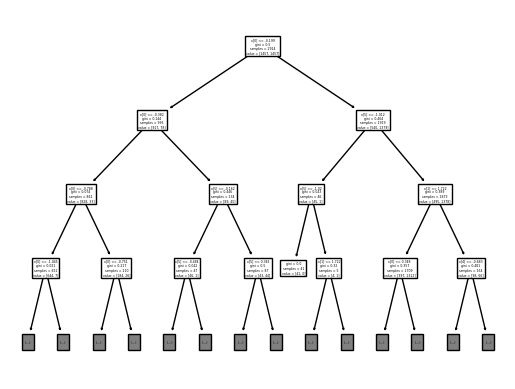

In [59]:
#, max_depth = 5
plot_tree(desc_pipe.named_steps['DT'], max_depth = 3)

In [53]:
svm_pipe.fit(X_train_r,y_train_r)
desc_pipe.fit(X_train_r,y_train_r)

svm_pred  = svm_pipe.predict(X_test)
desc_pred  = desc_pipe.predict(X_test)

svm_cm = confusion_matrix(y_test,svm_pred)
desc_cm = confusion_matrix(y_test,desc_pred)

svm_f1 = f1_score(y_test,svm_pred)
desc_f1 = f1_score(y_test,desc_pred)

In [54]:
print('Mean f1 scores:')

print('SVM mean :',svm_f1)
print('DT mean :',desc_f1)

Mean f1 scores:
SVM mean : 0.16929133858267717
DT mean : 0.15267175572519084


In [55]:
svm_pipe = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1250,gamma=0.1,kernel='rbf',random_state=43))])

svm_pipe.fit(X_train_r,y_train_r)

svm_tuned_pred   = svm_pipe.predict(X_test)

In [56]:
print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      3404
           1       0.09      0.39      0.15       173

    accuracy                           0.78      3577
   macro avg       0.53      0.60      0.51      3577
weighted avg       0.92      0.78      0.84      3577

Accuracy Score:  0.7827788649706457
F1 Score:  0.1489594742606791


In [57]:
desc_pipe = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_leaf=1, min_samples_split=2, random_state=42))])

desc_pipe.fit(X_train_r,y_train_r)

dt_tuned_pred = desc_pipe.predict(X_test)

In [58]:
print(classification_report(y_test,dt_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,dt_tuned_pred))
print('F1 Score: ',f1_score(y_test,dt_tuned_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3404
           1       0.11      0.23      0.15       173

    accuracy                           0.88      3577
   macro avg       0.54      0.57      0.54      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8758736371260833
F1 Score:  0.15267175572519084
